In [1]:
# SimpleRNN 구현

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/AI/equip11.csv')
df.head()

,regdate,temp1,temp2,temp3,temp4,temp5,temp6
0,2019-04-10 8:00,19.5,-81.4,-9.7,32.4,50.4,34.4
1,2019-04-10 8:01,20.8,-81.0,-5.1,32.3,51.6,34.2
2,2019-04-10 8:02,21.5,-80.6,-1.6,32.2,52.6,33.9
3,2019-04-10 8:08,33.0,-78.9,-20.8,33.7,51.5,36.9
4,2019-04-10 8:09,33.8,-78.6,-25.1,33.6,48.9,35.2


In [3]:
# 문자열을 날짜 형식으로 변환
df['regdate'] = pd.to_datetime(df.regdate, format='%Y-%m-%d %H:%M')

df.index = df['regdate']  # 날짜를 인덱스로 설정

data = df.sort_index(ascending=True, axis=0) # 행단위 오름차순 정렬

data.head()

,regdate,temp1,temp2,temp3,temp4,temp5,temp6
regdate,,,,,,,
2019-04-10 08:00:00,2019-04-10 08:00:00,19.5,-81.4,-9.7,32.4,50.4,34.4
2019-04-10 08:01:00,2019-04-10 08:01:00,20.8,-81.0,-5.1,32.3,51.6,34.2
2019-04-10 08:02:00,2019-04-10 08:02:00,21.5,-80.6,-1.6,32.2,52.6,33.9
2019-04-10 08:08:00,2019-04-10 08:08:00,33.0,-78.9,-20.8,33.7,51.5,36.9
2019-04-10 08:09:00,2019-04-10 08:09:00,33.8,-78.6,-25.1,33.6,48.9,35.2


In [4]:
# 공백 데이터프레임 생성
new_data = pd.DataFrame(index=range(0, len(df)), columns=['regdate', 'temp1'])

for i in range(0, len(data)) :
  new_data['regdate'][i] = data['regdate'][i]
  new_data['temp1'][i] = data['temp1'][i]
new_data.index = new_data.regdate  # 인덱스 설정
new_data.head()

,regdate,temp1
regdate,,
2019-04-10 08:00:00,2019-04-10 08:00:00,19.5
2019-04-10 08:01:00,2019-04-10 08:01:00,20.8
2019-04-10 08:02:00,2019-04-10 08:02:00,21.5
2019-04-10 08:08:00,2019-04-10 08:08:00,33.0
2019-04-10 08:09:00,2019-04-10 08:09:00,33.8


In [5]:
# 날짜 열 제거
new_data.drop('regdate', axis=1, inplace=True)

final_data = new_data.values  # array 타입으로 변환

train_data = final_data[0:120, :]
valid_data = final_data[120:, :]

# 스케일러 객체 생성
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_data)  # 정규화 실행

# 리스트 초기화
x_train, y_train = [], []
for i in range(10, len(train_data)) :
  x_train.append(scaled_data[i-10:i , 0])
  y_train.append(scaled_data[i, 0])

# numpy 배열로 변환
x_train, y_train = np.array(x_train), np.array(y_train)

# SimpleRNN 에 입력하기 위해 훈련데이터를 3차원으로 변환
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
# SimpleRNN model 설계
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True,
                              input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(units=10),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(loss='mse', optimizer='adam')
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 10)            120       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [8]:
history_rnn = rnn_model.fit(x_train, y_train, epochs=20, batch_size=1,
                            validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 2s 24ms/step - loss: 0.0182 - val_loss: 0.0161
Epoch 2/20
88/88 [==============================] - 2s 21ms/step - loss: 0.0190 - val_loss: 0.0211
Epoch 3/20
88/88 [==============================] - 2s 21ms/step - loss: 0.0181 - val_loss: 0.0172
Epoch 4/20
88/88 [==============================] - 2s 23ms/step - loss: 0.0191 - val_loss: 0.0176
Epoch 5/20
88/88 [==============================] - 2s 24ms/step - loss: 0.0181 - val_loss: 0.0163
Epoch 6/20
88/88 [==============================] - 2s 21ms/step - loss: 0.0188 - val_loss: 0.0158
Epoch 7/20
88/88 [==============================] - 2s 22ms/step - loss: 0.0177 - val_loss: 0.0171
Epoch 8/20
88/88 [==============================] - 2s 22ms/step - loss: 0.0185 - val_loss: 0.0200
Epoch 9/20
88/88 [==============================] - 2s 24ms/step - loss: 0.0189 - val_loss: 0.0195
Epoch 10/20
88/88 [==============================] - 2s 23ms/step - loss: 0.0177 - val_loss: 0.0156
Epoch 11/

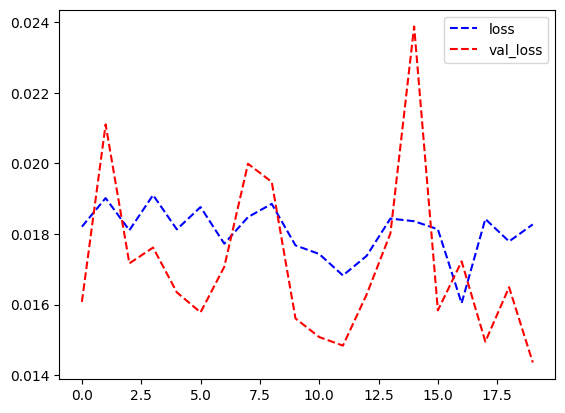

In [9]:
plt.plot(history_rnn.history['loss'], 'b--', label='loss')
plt.plot(history_rnn.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()